# Machine Learning Project

### Load the data into a dataframe

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("Train.csv")
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
1,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
2,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
3,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
4,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0


### Encode the character features 

In [2]:
# TODO 

<AxesSubplot:>

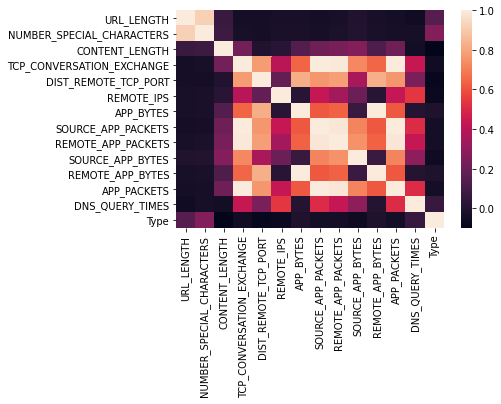

In [3]:
sns.heatmap(data.corr())

In [4]:
# so that the WHOIS_COUNTRY column is the same each run
data["CHARSET"] = pd.read_csv("Train.csv")["CHARSET"]

In [5]:
from sklearn.preprocessing import OneHotEncoder

data["CHARSET"]= data["CHARSET"].apply(lambda x: x.upper())
#list(X.value_counts().index)
index  = 0
array = []
for name in list(data["CHARSET"].value_counts().index):
    array.append([name, index])
    index += 1

CHARSET_enc = OneHotEncoder(drop='first').fit(array)
dictionary = {}

cats = CHARSET_enc.categories_[0]
indices = CHARSET_enc.categories_[1]
for cat, index in zip(cats, indices):
    dictionary[cat] = index

charset = [[charset, dictionary[charset]] for charset in list(data["CHARSET"])]
#CHARSET_enc.transform(array).toarray()
#CHARSET_enc.transform([list(data["CHARSET"])]).toarray()

data["CHARSET"] = CHARSET_enc.transform(charset).toarray()

In [6]:
# so that the WHOIS_COUNTRY column is the same each run
data["SERVER"] = pd.read_csv("Train.csv")["SERVER"]

In [7]:

X = data["SERVER"].fillna("None")

index  = 0
array = []
for name in list(X.value_counts().index):
    array.append([name, index])
    index += 1

SERVER_enc = OneHotEncoder(drop='first').fit(array)

dictionary = {}
cats = SERVER_enc.categories_[0]
indices = SERVER_enc.categories_[1]
for cat, index in zip(cats, indices):
    dictionary[cat] = index
    
server = [[server, dictionary[server]] for server in list(data["SERVER"].fillna("None"))]
data["SERVER"] = SERVER_enc.transform(server).toarray()

In [8]:
# so that the WHOIS_COUNTRY column is the same each run
data["WHOIS_COUNTRY"] = pd.read_csv("Train.csv")["WHOIS_COUNTRY"]

In [9]:
# so that the WHOIS_COUNTRY column is the same each run
data["WHOIS_COUNTRY"] = pd.read_csv("Train.csv")["WHOIS_COUNTRY"]

data["WHOIS_COUNTRY"] = data["WHOIS_COUNTRY"].apply(lambda x: x.upper())
data["WHOIS_COUNTRY"] = data["WHOIS_COUNTRY"].str.replace('UNITED KINGDOM', 'UK', case= False) 
data["WHOIS_COUNTRY"] = data["WHOIS_COUNTRY"].fillna("NONE")
X= data["WHOIS_COUNTRY"]
index  = 0
array = []
for name in list(X.value_counts().index):
    array.append([name, index])
    index += 1

COUNTRY_enc = OneHotEncoder(drop='first').fit(array)

dictionary = {}
cats = COUNTRY_enc.categories_[0]
indices = COUNTRY_enc.categories_[1]
for cat, index in zip(cats, indices):
    dictionary[cat] = index


country = [[country, dictionary[country]] for country in list(data["WHOIS_COUNTRY"].fillna("NONE"))]
data["WHOIS_COUNTRY"] = COUNTRY_enc.transform(country).toarray()

### Features most highly correlated with Type

In [10]:
data.corr()["Type"]

URL_LENGTH                   0.150140
NUMBER_SPECIAL_CHARACTERS    0.262379
CHARSET                     -0.010574
SERVER                      -0.009349
CONTENT_LENGTH              -0.098117
WHOIS_COUNTRY               -0.018719
TCP_CONVERSATION_EXCHANGE   -0.048396
DIST_REMOTE_TCP_PORT        -0.077496
REMOTE_IPS                  -0.067438
APP_BYTES                   -0.011302
SOURCE_APP_PACKETS          -0.040544
REMOTE_APP_PACKETS          -0.037299
SOURCE_APP_BYTES            -0.058839
REMOTE_APP_BYTES            -0.011090
APP_PACKETS                 -0.040544
DNS_QUERY_TIMES              0.062952
Type                         1.000000
Name: Type, dtype: float64

### Top 5 correlated features
- NUMBER_SPECIAL_CHARACTERS
- URL_LENGTH
- CONTENT_LENGTH
- DIST_REMOTE_TCP_PORT
- REMOTE_IPS

In [11]:
print("NAs present in CONTENT_LENGTH:", any(data["CONTENT_LENGTH"].isna()))
print("NAs present in NUMBER_SPECIAL_CHARACTERS:", any(data["NUMBER_SPECIAL_CHARACTERS"].isna()))
print("NAs present in URL_LENGTH:", any(data["URL_LENGTH"].isna()))
print("NAs present in DIST_REMOTE_TCP_PORT:", any(data["DIST_REMOTE_TCP_PORT"].isna()))
print("NAs present in REMOTE_IPS:", any(data["REMOTE_IPS"].isna()))

NAs present in CONTENT_LENGTH: True
NAs present in NUMBER_SPECIAL_CHARACTERS: False
NAs present in URL_LENGTH: False
NAs present in DIST_REMOTE_TCP_PORT: False
NAs present in REMOTE_IPS: False


### Only CONTENT_LENGTH needs to be cleaned
##### Linear regression is applied to missing values
- The rows could be omitted, however rows with missing "CONTENT_LENGTH" are often of "Type" 1, the lesser class and we therefore want to avoid dropping these

##### Another alternative is to replace these with 0 and see if the classifier is able to predict using this information

### Regress the values

In [12]:
data.corr()["CONTENT_LENGTH"]

URL_LENGTH                   0.067569
NUMBER_SPECIAL_CHARACTERS    0.075240
CHARSET                     -0.172040
SERVER                       0.000628
CONTENT_LENGTH               1.000000
WHOIS_COUNTRY               -0.024586
TCP_CONVERSATION_EXCHANGE    0.225403
DIST_REMOTE_TCP_PORT        -0.001285
REMOTE_IPS                   0.021816
APP_BYTES                    0.140473
SOURCE_APP_PACKETS           0.207385
REMOTE_APP_PACKETS           0.239295
SOURCE_APP_BYTES             0.269330
REMOTE_APP_BYTES             0.128048
APP_PACKETS                  0.207385
DNS_QUERY_TIMES             -0.043746
Type                        -0.098117
Name: CONTENT_LENGTH, dtype: float64

In [13]:
# select CONTENT_LENGTH rows with non-missing values
non_na_rows = data[data["CONTENT_LENGTH"].notna()]
# TODO there is a better way to do this


# select the highest correlated columns
reg_X = non_na_rows[["TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_PACKETS", "SOURCE_APP_PACKETS", "SOURCE_APP_BYTES", "APP_PACKETS"]]
reg_y = non_na_rows["CONTENT_LENGTH"]

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(reg_X, reg_y)

# fill rows with missing values using regressor

### Check Success rate of regressor

### Predict missing values 

In [15]:
content_length_values = list(data["CONTENT_LENGTH"])
nas = list(data["CONTENT_LENGTH"].isna())
na_rows = data[data["CONTENT_LENGTH"].isna()][["TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_PACKETS", "SOURCE_APP_PACKETS", "SOURCE_APP_BYTES", "APP_PACKETS"]]
predictions = regressor.predict(na_rows)


index = 0
for i in range(len(nas)):
    if nas[i]:
        content_length_values[i] = predictions[index]
        index += 1
data_copy = data.copy()
data_copy["CONTENT_LENGTH"] = content_length_values

### Replace with 0

In [16]:
X = data[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]]
y = data["Type"]
X_cleaned = data_copy[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", "CONTENT_LENGTH"]]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
LR = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test))

0.9023255813953488

In [18]:
# classification with the regressed CONTENT_LENGTH

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)
LR = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test))

/home/jakubhorvath/anaconda3/envs/LTR_annotator/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

In [19]:
### A lot less class 1 than class 0, need to find ways of replicating or selecting same amount of classes

### Sample the same number of examples from class 1 and 0

In [20]:
class_1 = data[data["Type"] == 1]
n_class_1 = len(class_1)
class_0 = data[data["Type"] == 0].sample(n=n_class_1, random_state=1)

X = pd.concat([class_1, class_0])
Y = X["Type"]
X = X.drop(["Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [25]:
class_1 = data_copy[data_copy["Type"] == 1]
n_class_1 = len(class_1)
class_0 = data_copy[data_copy["Type"] == 0].sample(n=n_class_1, random_state=1)

X = pd.concat([class_1, class_0])
Y = X["Type"]
X = X.drop(["Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [41]:
X_train = X_train[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()
X_test = X_test[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()

#TODO append another column of one hot encoded features

In [42]:
LR = LogisticRegression().fit(X_train, y_train)

In [43]:
accuracy_score(y_test, LR.predict(X_test))

0.8229166666666666